<a href="https://colab.research.google.com/github/Aqui1983/Module_13_Activities/blob/main/ins_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overfitting

In [1]:
import pandas as pd
import numpy as np

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [4]:
df = pd.read_csv('/content/meet_or_beat.csv')

### Preparing the Data

In [5]:
df.head()

,EPS,forecasted_eps,noOfEsts,after_total_returns,before_total_returns
0,2.01,1.67,11.0,0.051444,0.018585
1,0.17,0.19,6.0,0.112955,-0.000510
2,-0.07,0.14,4.0,0.077167,-0.046104
3,0.48,0.51,8.0,-0.006130,-0.004899
4,-0.24,-0.27,9.0,0.089762,-0.025466


In [7]:
df['earnings_quartile'] = (pd.qcut(df['EPS'], q=5, labels=False))+1

In [8]:
y_quartile = df['earnings_quartile']

In [9]:
number_classes = len(y_quartile.unique())
number_classes

5

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_quartile)
encoded_y = encoder.transform(y_quartile)
encoded_y

array([4, 2, 1, ..., 2, 1, 0])

In [11]:
from keras.utils.np_utils import to_categorical

y_categorical = to_categorical(encoded_y, number_classes)

In [12]:
df.columns

Index(['EPS', 'forecasted_eps', 'noOfEsts', 'after_total_returns',
       'before_total_returns', 'earnings_quartile'],
      dtype='object')

In [13]:
X = df[['forecasted_eps','before_total_returns','noOfEsts']]
X.head()

,forecasted_eps,before_total_returns,noOfEsts
0,1.67,0.018585,11.0
1,0.19,-0.000510,6.0
2,0.14,-0.046104,4.0
3,0.51,-0.004899,8.0
4,-0.27,-0.025466,9.0


### Building the Model

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y_categorical, random_state=1)

In [26]:
y_train

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [27]:
number_of_predictors = len(X.columns)
number_of_predictors

3

In [28]:
from keras.layers import Dropout
from keras.regularizers import l1,l2

In [29]:
model = Sequential()

model.add(
    Dense(10, input_dim = number_of_predictors, activation='relu')
)

model.add(
    Dropout(.2, input_shape=(10,))
)

model.add(
    Dense(number_classes, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))
)
model.add(
    Dense(number_classes, activation='softmax')
)

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                40        
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_7 (Dense)             (None, 5)                 55        
                                                                 
 dense_8 (Dense)             (None, 5)                 30        
                                                                 
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train,y_train, epochs=50, batch_size=1000, validation_split=0.2, shuffle=True)

Epoch 1/50
44/44 [==============================] - 1s 11ms/step - loss: 4.1009 - categorical_accuracy: 0.1959 - val_loss: 3.4044 - val_categorical_accuracy: 0.1928
Epoch 2/50
44/44 [==============================] - 0s 4ms/step - loss: 2.8882 - categorical_accuracy: 0.1953 - val_loss: 2.3498 - val_categorical_accuracy: 0.1972
Epoch 3/50
44/44 [==============================] - 0s 5ms/step - loss: 2.1484 - categorical_accuracy: 0.1963 - val_loss: 1.7023 - val_categorical_accuracy: 0.1586
Epoch 4/50
44/44 [==============================] - 0s 4ms/step - loss: 1.8703 - categorical_accuracy: 0.2418 - val_loss: 1.5881 - val_categorical_accuracy: 0.4102
Epoch 5/50
44/44 [==============================] - 0s 4ms/step - loss: 1.7083 - categorical_accuracy: 0.3182 - val_loss: 1.5113 - val_categorical_accuracy: 0.4382
Epoch 6/50
44/44 [==============================] - 0s 4ms/step - loss: 1.5905 - categorical_accuracy: 0.3439 - val_loss: 1.4298 - val_categorical_accuracy: 0.4441
Epoch 7/50
44/4

In [33]:
model_history = model.history.history
model_history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

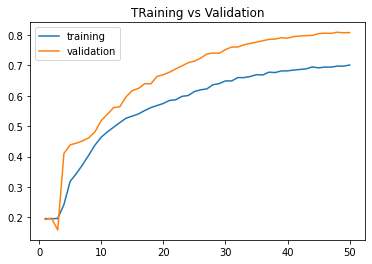

In [34]:

training_results = pd.DataFrame(index=range(1,51))
training_results['training'] = model_history['categorical_accuracy']
training_results['validation'] = model_history['val_categorical_accuracy']

training_results.plot(title='TRaining vs Validation')